# CHESS GAMES ANALYSIS - DATA SCIENCE PROJECT

## Introduction
The objective of this project is to analyze the chess games played on my Lichess account . The analysis will focus on understanding the outcomes of the games and identifying specific shortcomings in my play, particularly in certain openings

## Methods
To conduct this analysis, I will leverage popular Python libraries such as Pandas, NumPy, Seaborn and Matplotlib. These libraries will aid in processing, organizing, and visualizing the data extracted from my chess games.

## Data Collection
I will collect the necessary data from my Lichess account, including details about each game such as opening code, outcomes (win, loss, or draw), and other relevant information. Games can be conveniently downloaded directly from the Lichess user menu

## Dataset
The dataset encompasses 17,326 chess games, with the majority played in the blitz time format, specifically 3+0.

**3 + 0 time control:** Eeach player is allotted a total of 3 minutes, and there is no time increment for moves play.




In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Python chess packages


In [3]:
!pip install chess -q

In [4]:
import chess.pgn

## PGN parsing Function
Parsing games from a PGN database involves extracting relevant information such as player names, dates, results, and moves. To ensure meaningful analysis, it's essential to filter out games with missing or unknown Elo ratings denoted by "?". This is crucial as analyzing the correlation between Elo ratings and other parameters requires accurate Elo data. The parsed information will be organized into a DataFrame.

In [251]:
def parse_pgn(file_path, player_name, games_size):
    games_data = []

    with open(file_path, 'r', encoding='utf-8') as pgn_file:
        for i in range(games_size):
            game = chess.pgn.read_game(pgn_file)
            if game is None:
                break

            header_info = "\n".join(f"[{key} \"{value}\"]" for key, value in game.headers.items())
            moves = " ".join(str(move) for move in game.mainline_moves())

            white_elo = game.headers.get("WhiteElo", "")
            black_elo = game.headers.get("BlackElo", "")

            # Skip games with "?" in Elo ratings
            if "?" in (white_elo + black_elo):
                continue

            player_color = "White" if player_name.lower() == game.headers.get("White", "").lower() else "Black"
            player_rating = game.headers.get("WhiteElo", "") if player_color.lower() == "white" else game.headers.get("BlackElo", "")
            opponent_rating = game.headers.get("WhiteElo", "") if player_color.lower() == "black" else game.headers.get("BlackElo", "")

            result = game.headers.get("Result", "")
            if result == "1/2-1/2":
                result_value = 0.5
            elif player_color == "White" and result == "1-0":
                result_value = 1.0
            elif player_color == "White" and result == "0-1":
                result_value = 0.0
            elif player_color == "Black" and result == "1-0":
                result_value = 0.0
            elif player_color == "Black" and result == "0-1":
                result_value = 1.0
            else:
                result_value = None  # Handle other cases as needed

            if result_value is not None:
                game_info = {
                    "Event": game.headers.get("Event", ""),
                    "Date": game.headers.get("Date", ""),
                    "PlayerColor": player_color,
                    "PlayerRating": int(player_rating),
                    "OpponentRating": int(opponent_rating),
                    "RatingDifference": int(player_rating) - int(opponent_rating),
                    "Result": result_value,
                    "Date": game.headers.get("UTCDate", ""),
                    "ECO": game.headers.get("ECO", ""),
                    "Termination": game.headers.get("Termination", ""),
                    "Moves": moves,
                    "NumberOfMoves": len(moves.split()) // 2,  # Assuming each move consists of a white and a black move
                    # Add more headers as needed
                }

                games_data.append(game_info)

    return pd.DataFrame(games_data)

In [252]:
pgn_file_path = "lichess_ugurjoe.pgn"
games_size = 17326
df = parse_pgn(pgn_file_path,"ugurjoe", games_size)

In [253]:
df.shape

(17293, 11)

In [254]:
df.dtypes

Event                object
Date                 object
PlayerColor          object
PlayerRating          int64
OpponentRating        int64
RatingDifference      int64
Result              float64
ECO                  object
Termination          object
Moves                object
NumberOfMoves         int64
dtype: object

In [255]:
df.head()

,Event,Date,PlayerColor,PlayerRating,OpponentRating,RatingDifference,Result,ECO,Termination,Moves,NumberOfMoves
0,Rated Blitz game,2023.12.09,Black,2242,2316,-74,1.0,A08,Time forfeit,g1f3 d7d5 d2d3 g8f6 g2g3 e7e6 f1g2 f8e7 e1g1 e...,34
1,Rated Blitz game,2023.12.09,Black,2235,2322,-87,1.0,C65,Normal,e2e4 e7e5 g1f3 b8c6 f1b5 g8f6 d2d3 f8c5 c2c3 e...,17
2,Rated Blitz game,2023.12.09,White,2241,2228,13,0.0,A54,Time forfeit,d2d4 g8f6 c2c4 d7d6 b1c3 e7e5 d4e5 d6e5 e2e4 f...,32
3,Rated Blitz game,2023.12.08,Black,2246,2277,-31,0.0,D02,Normal,d2d4 d7d5 g1f3 g8f6 c2c4 e7e6 g2g3 c7c6 f1g2 f...,36
4,Rated Blitz game,2023.12.06,White,2240,2232,8,1.0,E91,Time forfeit,d2d4 g8f6 c2c4 g7g6 b1c3 f8g7 e2e4 d7d6 g1f3 e...,52


In [256]:
df.describe()

,PlayerRating,OpponentRating,RatingDifference,Result,NumberOfMoves
count,17293.000000,17293.000000,17293.000000,17293.000000,17293.000000
mean,2070.001214,2053.891632,16.109582,0.510033,35.392413
std,166.999343,200.556355,118.499972,0.490248,15.795970
min,1358.000000,798.000000,-697.000000,0.000000,0.000000
25%,2008.000000,1993.000000,-25.000000,0.000000,24.000000
50%,2121.000000,2104.000000,3.000000,0.500000,33.000000
75%,2187.000000,2184.000000,35.000000,1.000000,45.000000
max,2328.000000,2640.000000,1226.000000,1.000000,109.000000


## Rating Analysis

Visualize the chess progress of the selected player over time 

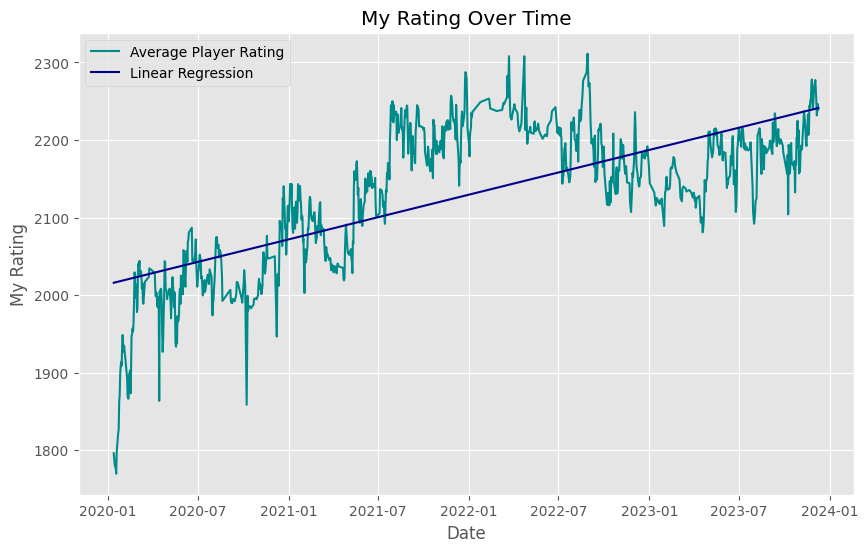

In [267]:
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime for proper sorting

# Filter the DataFrame for the player's games and starting from 2020
player_df = df[df['Date'] >= '2020-01-01']

# Group by 'Date' and calculate the average rating for each day
daily_avg_df = player_df.groupby('Date')['PlayerRating'].mean().reset_index()

# Convert datetime objects to ordinal values for linear regression
daily_avg_df['Date_Ordinal'] = daily_avg_df['Date'].map(lambda date: date.toordinal())

# Assuming daily_avg_df['Date_Ordinal'] contains ordinal values
X = np.array(daily_avg_df['Date_Ordinal']).reshape(-1, 1)
y = np.array(daily_avg_df['PlayerRating'])

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict ratings using the linear regression model
predictions = model.predict(X)

# Plot the average player's rating over time with a continuous line
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_df['Date'], daily_avg_df['PlayerRating'], label='Average Player Rating', linestyle='-', color='darkcyan')
plt.plot(daily_avg_df['Date'], predictions, label='Linear Regression', linestyle='-', color='darkblue')
plt.title('My Rating Over Time')
plt.xlabel('Date')
plt.ylabel('My Rating')
plt.legend()
plt.grid(True)
plt.show()


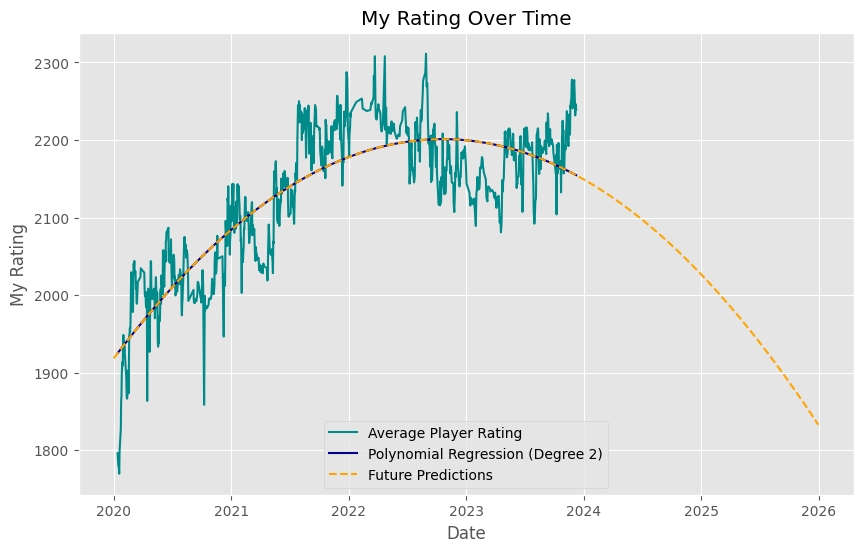

In [268]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime for proper sorting

# Filter the DataFrame for the player's games and starting from 2020
player_df = df[df['Date'] >= '2020-01-01']

# Group by 'Date' and calculate the average rating for each day
daily_avg_df = player_df.groupby('Date')['PlayerRating'].mean().reset_index()

# Convert datetime objects to ordinal values for linear regression
daily_avg_df['Date_Ordinal'] = daily_avg_df['Date'].map(lambda date: date.toordinal())

# Assuming daily_avg_df['Date_Ordinal'] contains ordinal values
X = np.array(daily_avg_df['Date_Ordinal']).reshape(-1, 1)
y = np.array(daily_avg_df['PlayerRating'])

# Fit a polynomial regression model
degree = 2  # You can adjust the degree of the polynomial
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)

# Predict ratings using the polynomial regression model
predictions = model.predict(X)

# Plot the average player's rating over time with a continuous line
plt.figure(figsize=(10, 6))
plt.plot(daily_avg_df['Date'], daily_avg_df['PlayerRating'], label='Average Player Rating', linestyle='-', color='darkcyan')
plt.plot(daily_avg_df['Date'], predictions, label=f'Polynomial Regression (Degree {degree})', linestyle='-', color='darkblue')

# Extend the range of dates for predictions (example: January 2020 to December 2025)
future_dates = pd.date_range(start='2020-01-01', end='2025-12-31', freq='D')
future_dates_ordinal = np.array([date.toordinal() for date in future_dates]).reshape(-1, 1)

# Predict ratings for future dates
future_predictions = model.predict(future_dates_ordinal)

# Plot the predicted ratings for future dates
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--', color='orange')

plt.title('My Rating Over Time')
plt.xlabel('Date')
plt.ylabel('My Rating')
plt.legend()
plt.grid(True)
plt.show()


## Rating Differences Distribution

Lets check if there is a huge skill diference between players in the database games

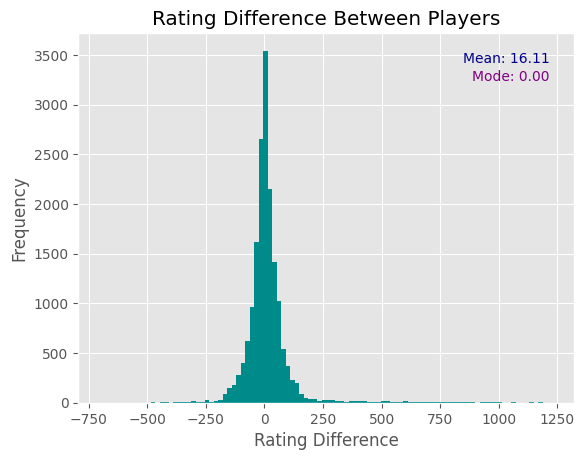

In [269]:
ax = df["RatingDifference"].plot(kind="hist", bins=100, title="Rating Difference Between Players", color='darkcyan')
ax.set_xlabel("Rating Difference")

# Calculate mean and mode
mean_value = df["RatingDifference"].mean()
mode_value = df["RatingDifference"].mode()[0]  # .mode() returns a Series, [0] gets the first mode if exists

# Add mean and mode annotations to the top right corner of the plot
ax.text(0.95, 0.95, f'Mean: {mean_value:.2f}', color='darkblue', ha='right', va='top', transform=ax.transAxes, fontsize=10)
ax.text(0.95, 0.90, f'Mode: {mode_value:.2f}', color='purple', ha='right', va='top', transform=ax.transAxes, fontsize=10)

plt.show()

## Openings Distribution

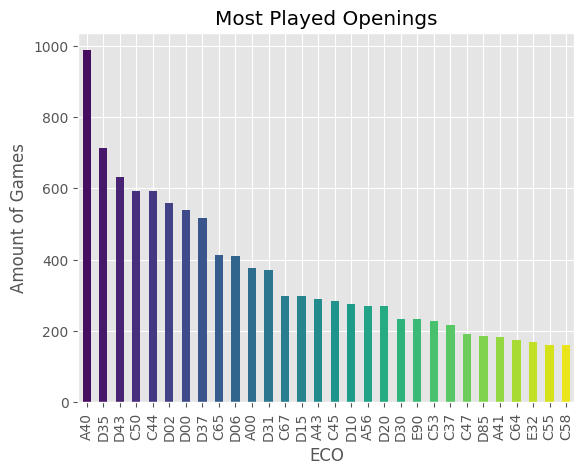

In [270]:
value_counts = df["ECO"].value_counts().head(30)

# Create a customized dark cyan colormap
custom_cmap = sns.color_palette("viridis", n_colors=len(value_counts))

# Plot the bar chart with the customized colormap
value_counts.plot(kind="bar", color=custom_cmap, title="Most Played Openings").set_ylabel("Amount of Games")
plt.show()


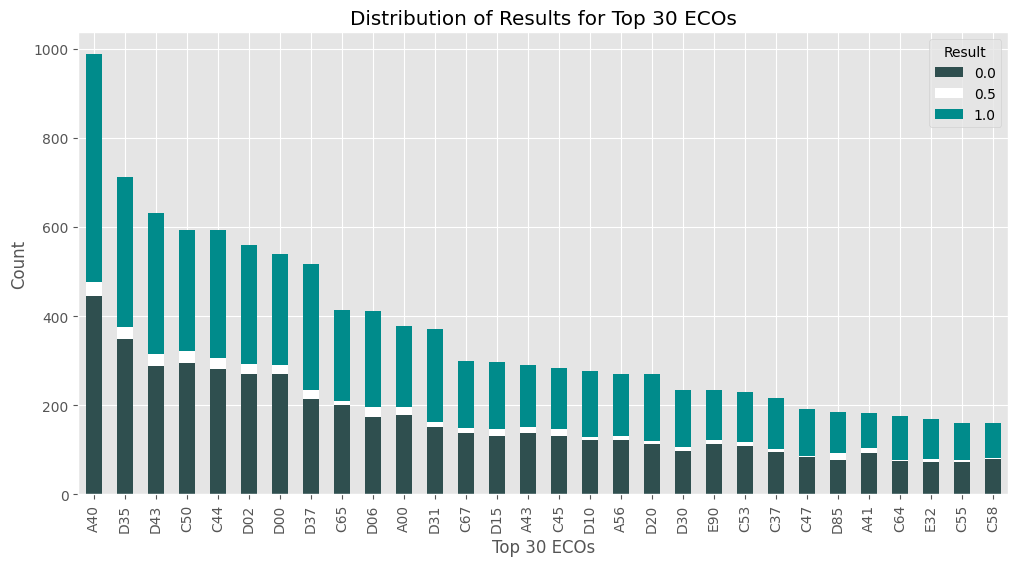

In [266]:
from matplotlib.colors import ListedColormap

unique_ecos = df["ECO"].nunique()
value_counts = df["ECO"].value_counts().head(30)

# Filter the DataFrame for the top 30 ECOs
filtered_df = df[df["ECO"].isin(value_counts.index)]

# Create a DataFrame with counts of each result for the top 30 ECOs
result_counts_df = filtered_df.groupby(["ECO", "Result"]).size().unstack(fill_value=0)

# Calculate the total count for each ECO and sort the ECOs based on these totals
result_counts_df['Total'] = result_counts_df.sum(axis=1)
result_counts_df = result_counts_df.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Create a custom colormap with shades of cyan (top color is dark cyan)
cyan_shades = sns.color_palette(["darkslategrey", "white", "darkcyan"], as_cmap=True)
custom_cmap = ListedColormap(cyan_shades)

# Plot the grouped bar chart with the custom colormap
result_counts_df.plot(kind="bar", stacked=True, colormap=custom_cmap, figsize=(12, 6))
plt.title("Distribution of Results for Top 30 ECOs")
plt.xlabel("Top 30 ECOs")
plt.ylabel("Count")
plt.legend(title="Result", loc="upper right", labels=['0.0', '0.5', '1.0'])
plt.show()


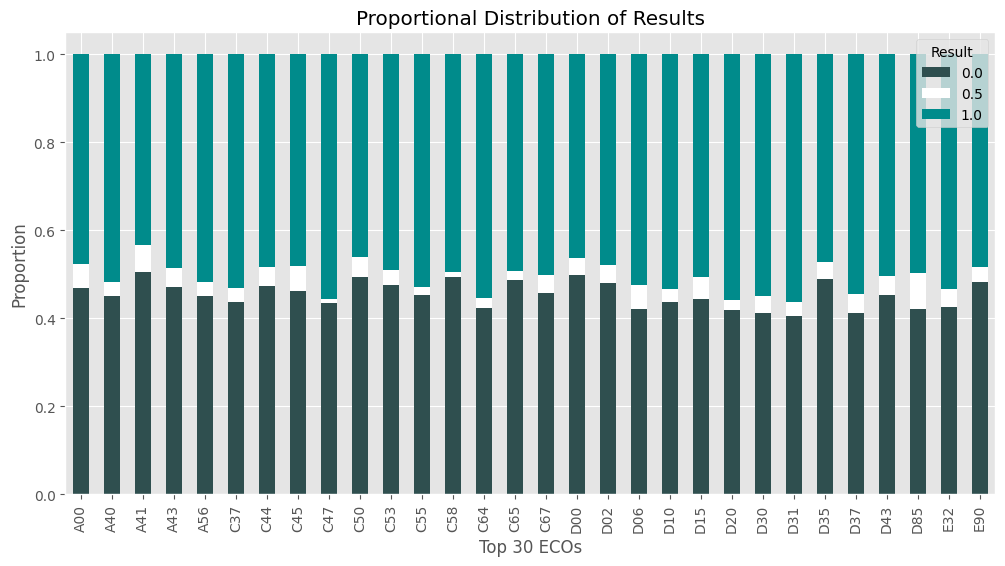

In [271]:
unique_ecos = df["ECO"].nunique()
value_counts = df["ECO"].value_counts().head(30)

# Create a DataFrame with counts of each result for the top 30 ECOs
result_counts_df = df[df["ECO"].isin(value_counts.index)].groupby(["ECO", "Result"]).size().unstack(fill_value=0)

# Normalize the counts to get proportions
result_proportions_df = result_counts_df.div(result_counts_df.sum(axis=1), axis=0)

cyan_shades = sns.color_palette(["darkslategrey", "white", "darkcyan"], as_cmap=True)
custom_cmap = ListedColormap(cyan_shades)

# Plot the stacked bar chart
result_proportions_df.plot(kind="bar", stacked=True, colormap= custom_cmap, figsize=(12, 6))
plt.title("Proportional Distribution of Results")
plt.xlabel("Top 30 ECOs")
plt.ylabel("Proportion")
plt.legend(title="Result", loc="upper right", labels=['0.0', '0.5', '1.0'])
plt.show()


## Find The Most Comon Positions

You can change movecount parameter to search for the positions in the desired depth.
In this cell each sides move is considered as 1 move so it is not exactly how chess moves are counted. Don't be confuse because in our DataFrame
NumberOfMoves was calculated by  **all moves / 2**

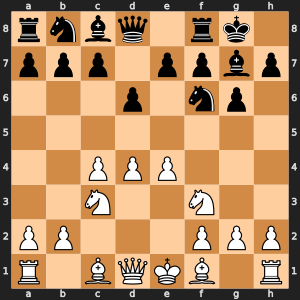

Total Games Played: 192
Success Rate: 50.00%
Win Rate: 48.44%
Lose Rate: 48.44%
Draw Rate: 3.12%



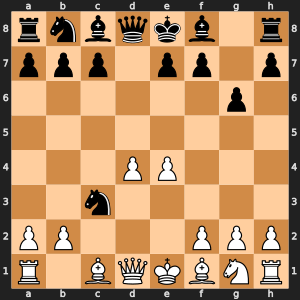

Total Games Played: 191
Success Rate: 57.07%
Win Rate: 52.88%
Lose Rate: 38.74%
Draw Rate: 8.38%



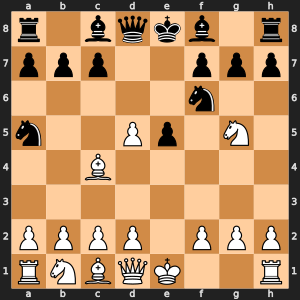

Total Games Played: 190
Success Rate: 48.68%
Win Rate: 47.37%
Lose Rate: 50.00%
Draw Rate: 2.63%



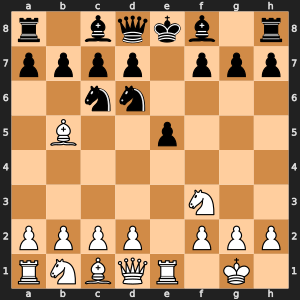

Total Games Played: 133
Success Rate: 54.14%
Win Rate: 53.38%
Lose Rate: 45.11%
Draw Rate: 1.50%



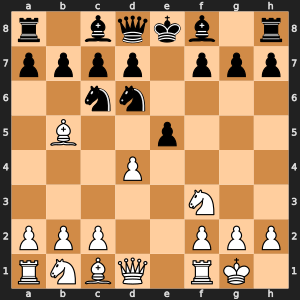

Total Games Played: 114
Success Rate: 54.82%
Win Rate: 50.88%
Lose Rate: 41.23%
Draw Rate: 7.89%



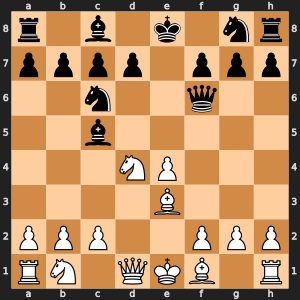

Total Games Played: 81
Success Rate: 49.38%
Win Rate: 45.68%
Lose Rate: 46.91%
Draw Rate: 7.41%



In [263]:
import chess
import chess.svg
from IPython.display import display, SVG

# Create a copy of the original DataFrame
df_copy = df.copy()

# Select the depth to search
movecount = 10

df_copy['moves_list'] = df_copy['Moves'].apply(lambda x: x.split())
df_copy['first_n_moves'] = df_copy['moves_list'].apply(lambda x: ' '.join(x[:movecount]))

# Filter out games with move count less than the specified move count
df_copy = df_copy[df_copy['NumberOfMoves'] >= movecount]

# Find the most common positions
most_common_positions = df_copy['first_n_moves'].value_counts().head(6)

# Set the size of the chessboard
board_size = 300

# Display the most common 6 positions with adjusted size, win/lose rates, and total games played
for position, occurrences in most_common_positions.items():
    board = chess.Board()
    for move in position.split():
        board.push_uci(move)

    # Calculate win and lose rates for the current position
    position_df = df_copy[df_copy['first_n_moves'] == position]
    total_games = len(position_df)
    win_rate = position_df[position_df['Result'] == 1]['Result'].count() / total_games
    lose_rate = position_df[position_df['Result'] == 0]['Result'].count() / total_games
    draw_rate = position_df[position_df['Result'] == 0.5]['Result'].count() / total_games
    success_rate = win_rate + draw_rate * 0.5

    # Display the chessboard and win/lose rates
    svg_board = chess.svg.board(board=board, size=board_size)
    display(SVG(svg_board))
    print(f"Total Games Played: {occurrences}")
    print(f"Success Rate: {success_rate:.2%}\nWin Rate: {win_rate:.2%}\nLose Rate: {lose_rate:.2%}\nDraw Rate: {draw_rate:.2%}\n{'='*20}\n")


## MAPPING

Inorder to use non numerical values in heat map we need to map these values to a numerical type such as int

In [280]:
# Assuming your DataFrame is named 'df'

# Create a new DataFrame with mapped values and without the 'Moves' column
mapped_df = df.assign(
    PlayerColor_mapped=df['PlayerColor'].map({'White': 1, 'Black': 0}),
    Termination_mapped=df['Termination'].map({'Normal': 1, 'Time forfeit': 0}).fillna(1),  # Fill NaN with 1 for 'Normal'
    Event_mapped=df['Event'].map({'Rated Blitz game': 1,'Rated Rapid game': 0 }).fillna(1)  # Fill NaN with 1 for 'Rated Blitz Game'
).drop(columns=['Moves'])

# Display the updated DataFrame
mapped_df.head()


,Event,Date,PlayerColor,PlayerRating,OpponentRating,RatingDifference,Result,ECO,Termination,NumberOfMoves,PlayerColor_mapped,Termination_mapped,Event_mapped
0,Rated Blitz game,2023-12-09,Black,2242,2316,-74,1.0,A08,Time forfeit,34,0,0.0,1.0
1,Rated Blitz game,2023-12-09,Black,2235,2322,-87,1.0,C65,Normal,17,0,1.0,1.0
2,Rated Blitz game,2023-12-09,White,2241,2228,13,0.0,A54,Time forfeit,32,1,0.0,1.0
3,Rated Blitz game,2023-12-08,Black,2246,2277,-31,0.0,D02,Normal,36,0,1.0,1.0
4,Rated Blitz game,2023-12-06,White,2240,2232,8,1.0,E91,Time forfeit,52,1,0.0,1.0


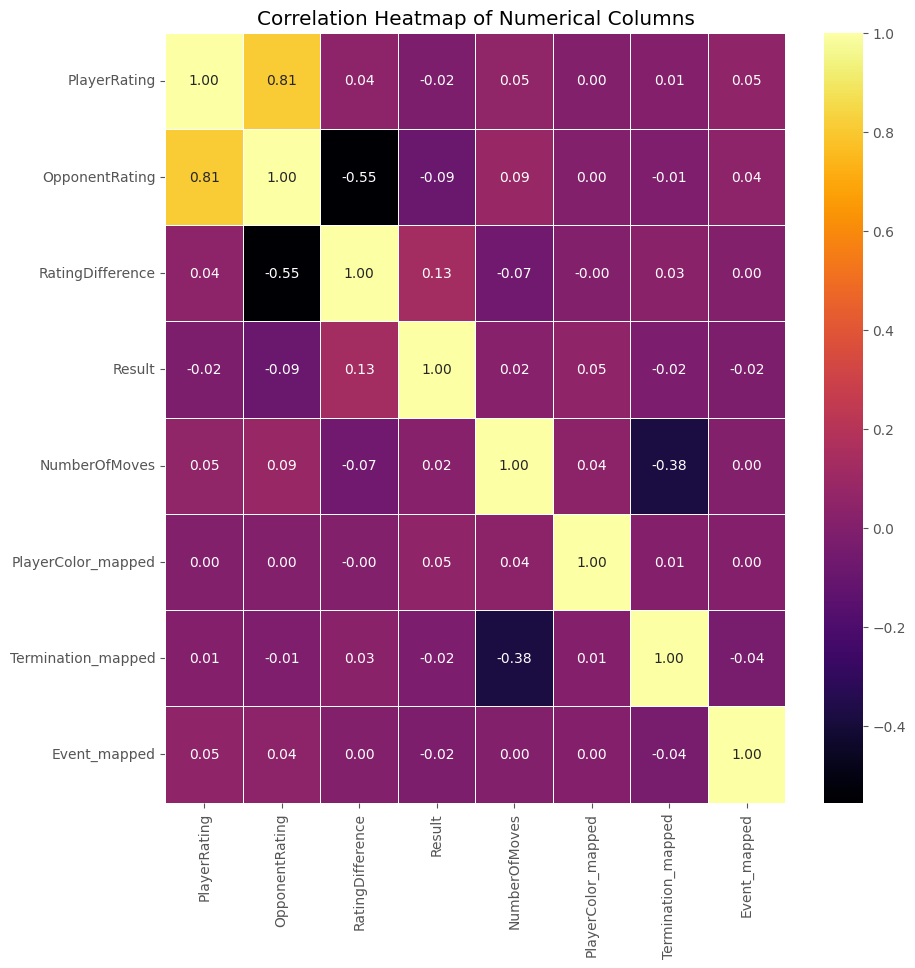

In [281]:
#4pts

# Select numerical columns only
numerical_columns = mapped_df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set the color palette to 'inferno'
sns.set_palette("inferno")

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()
